In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

import torch
import optuna
import torch_geometric.transforms as T
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from torch_geometric.data import NeighborSampler
from torch.optim import lr_scheduler
import torch.optim as optim
import collections
import numpy as np
from modules.model import Net
from sklearn.metrics import f1_score
from modules.sampling import Sampler, SamplerContextMatrix, SamplerRandomWalk,SamplerFactorization,SamplerAPP
from datetime import datetime
import random
from torch_geometric.data import GraphSAINTNodeSampler
import pickle
import os
from torch_geometric.data import Data
import collections
from torch_geometric.datasets import Planetoid,WikipediaNetwork,Actor,WebKB

ModuleNotFoundError: No module named 'pandas'

In [6]:
import pandas as pd
import collections
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px


In [9]:
#список функций потерь и характеристик графа
df=pd.read_csv('final_data.csv')
df=df.drop(columns=['Unnamed: 0'])
losses=list(dict(collections.Counter(df['loss'])).keys())

attrs=['label assortativity','feature assortativity', 'cluster coefficient', 'average shortest path','average degree']


In [10]:
font = {'size' : 25}
matplotlib.rc('font', **font)

### тут я считаю корреляцию между результатами с использованием разных функций потерь. Это относится к Results and Discussion 4 point начинающийся со слов "pearson correlation"

In [11]:
from scipy.stats import kendalltau as Kcorr
from scipy.stats import pearsonr as Pcorr

In [12]:

df=pd.read_csv('final_data.csv')
df=df.drop(columns=['Unnamed: 0'])

losses = list(dict(collections.Counter(df['loss'])).keys())

su=0
ff=0
for i,loss1 in enumerate(losses):
    for loss2 in losses[i+1:]:
       # print(loss1,loss2)
        su+=1
        x=df[(df['loss']==loss1) & (df['conv'] == 'GCN' )]['test acc micro']
        y=df[(df['loss']==loss2) & (df['conv'] == 'GCN' )]['test acc micro']
        if Pcorr(x,y)[0]<0.98:
            ff+=1   
print(ff,su)


47 91


# COMPARISON OF DENSITY OF BENCHMARK SPACE - figure 2

In [ ]:
df_2 = pd.read_excel('benchmark_space_ideal.xlsx')

In [ ]:
import pandas as pd
import collections
df=pd.read_csv('final_data.csv')
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
font = {'size' : 20}
matplotlib.rc('font', **font)

In [ ]:
fig2=px.parallel_coordinates(df,dimensions=['label assortativity', 'feature assortativity', 'cluster coefficient', 'average shortest path', 'average degree'])
fig2.update_layout(
    font=dict(
        size=22,  # Set the font size here
        color = 'black'
    )
)

fig2.show()

In [ ]:
fig2=px.parallel_coordinates(df_2,dimensions=['label assortativity', 'feature assortativity', 'cluster coefficient', 'average shortest path', 'average degree'])
fig2.update_layout(
    font=dict(
        size=22,  # Set the font size here
        color = 'black'
    )
)

fig2.show()

# heatmaps - рисунок три 

In [13]:
df=pd.read_csv('final_data.csv')
df=df.drop(columns=['Unnamed: 0'])

df_analysis = df.groupby(['group','label assortativity']).mean()['test acc micro']
df_analysis = df_analysis.unstack('label assortativity')
df_analysis['newlevel'] = 'label assortativity'
df_analysis=df_analysis.set_index('newlevel', append=True).unstack('newlevel')

for attr in attrs:
    df_1 = df.groupby(['group',attr]).mean()['test acc micro']
    df_1 = df_1.unstack(attr)
    df_1['newlevel'] = attr
    df_1 = df_1.set_index('newlevel', append=True).unstack('newlevel')
    
    df_analysis = pd.merge(df_analysis,df_1,on=['group'],how='left')


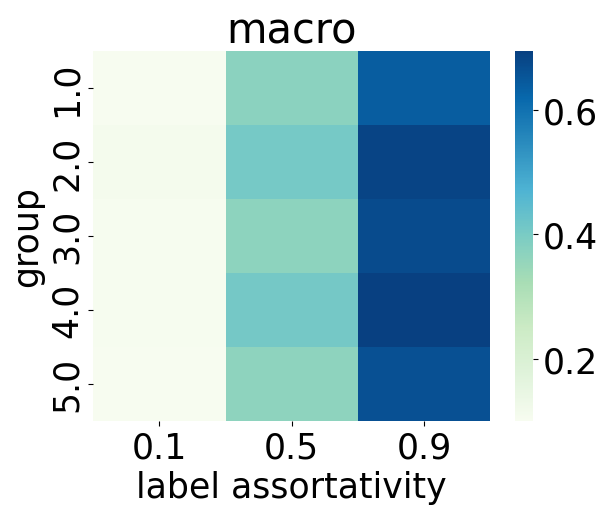

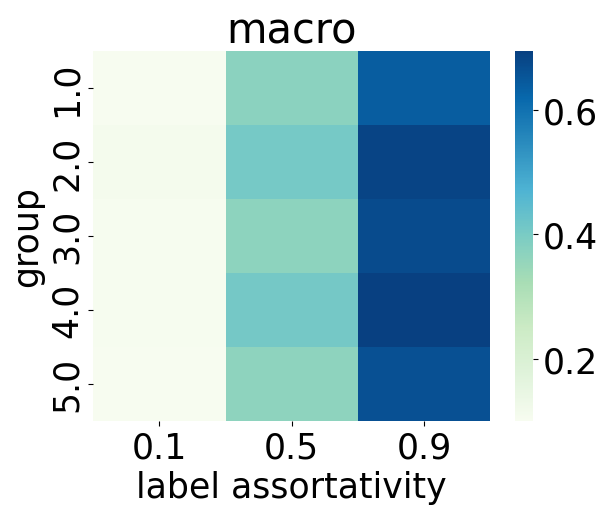

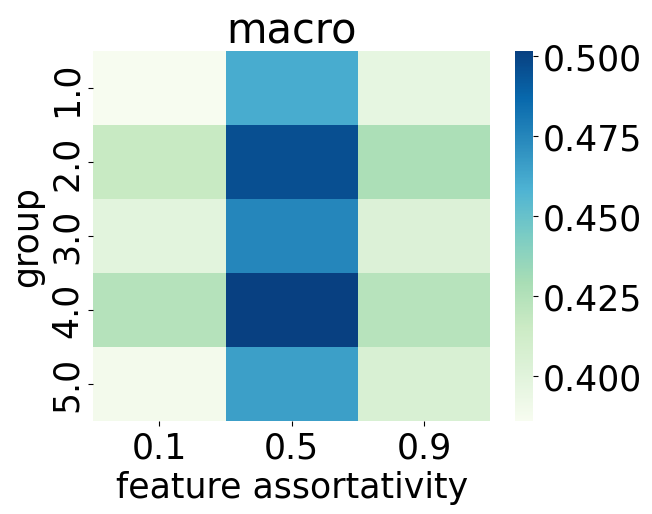

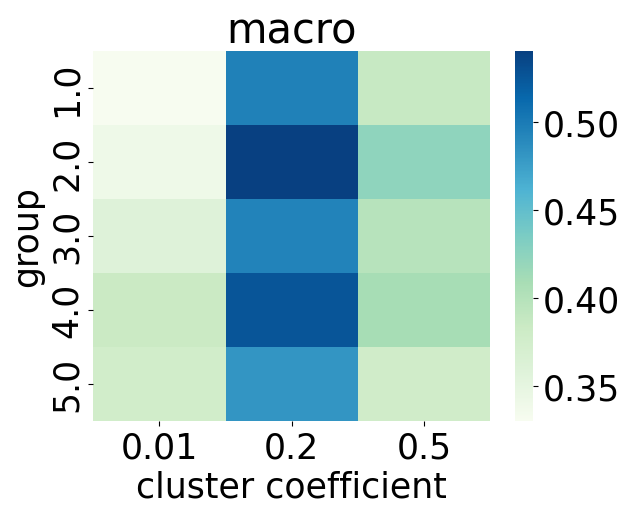

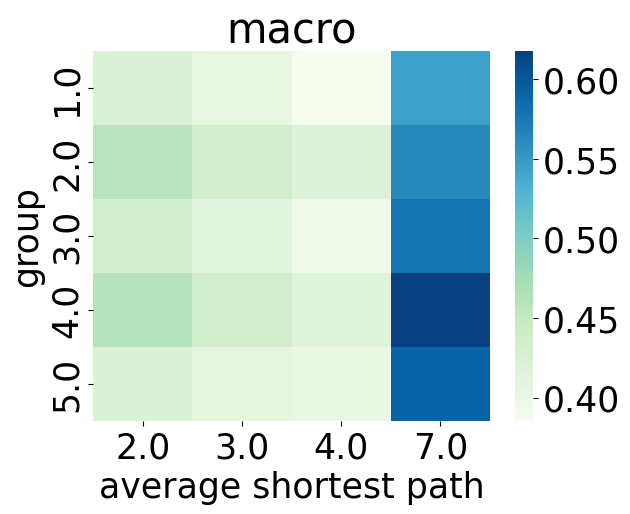

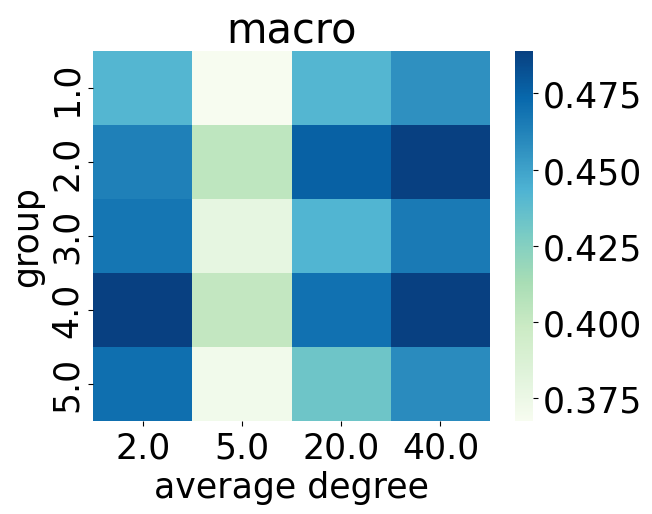

In [14]:
for attr in ['label assortativity']+attrs:
    df_1 = df.groupby(['group',attr]).mean()['test acc macro']
    df_1 = df_1.unstack(attr)
    sns.heatmap(df_1,cmap='GnBu')
    plt.title('macro')
    plt.show()

# Global Ranking (таблицы из апендикса)

In [53]:
df_analysis = df.groupby(['group','loss','label assortativity']).std()['test acc micro']

df_analysis = df_analysis.unstack('label assortativity')
df_analysis['newlevel'] = 'label assortativity'
df_analysis=df_analysis.set_index('newlevel', append=True).unstack('newlevel')

for attr in attrs[1:]:
    df_1 = df.groupby(['group','loss',attr]).std()['test acc micro']
    df_1 = df_1.unstack(attr)
    df_1['newlevel'] = attr
    df_1 = df_1.set_index('newlevel', append=True).unstack('newlevel')
    
    df_analysis = pd.merge(df_analysis,df_1,on=['group','loss'],how='left')

df_analysis=df_analysis.round(decimals=2)
df_analysis

label assortativity                      0.1                 0.5  \
newlevel                 label assortativity label assortativity   
group loss                                                         
1.0   GraphFactorization                0.05                0.23   
      HOPE_AA                           0.05                0.23   
      HOPE_CN                           0.05                0.22   
      HOPE_Katz                         0.04                0.22   
      HOPE_RPR                          0.05                0.23   
2.0   DeepWalk                          0.04                0.23   
      Node2Vec                          0.05                0.23   
3.0   LapEigen                          0.05                0.20   
4.0   APP                               0.04                0.22   
      LINE                              0.05                0.23   
      VERSE_Adj                         0.04                0.21   
      VERSE_PPR                         0.04                0.23   
      VERSE_SR                          0.05                0.24   
5.0   Force2Vec                         0.04                0.20   

label assortativity                      0.9                   0.1  \
newlevel                 label assortativity feature assortativity   
group loss                                                           
1.0   GraphFactorization                0.31                  0.31   
      HOPE_AA                           0.30                  0.31   
      HOPE_CN                           0.30                  0.30   
      HOPE_Katz                         0.30                  0.31   
      HOPE_RPR                          0.31                  0.31   
2.0   DeepWalk                          0.30                  0.32   
      Node2Vec                          0.30                  0.32   
3.0   LapEigen                          0.28                  0.30   
4.0   APP                               0.24                  0.32   
      LINE                              0.29                  0.32   
      VERSE_Adj                         0.29                  0.32   
      VERSE_PPR                         0.30                  0.32   
      VERSE_SR                          0.25                  0.32   
5.0   Force2Vec                         0.27                  0.28   

label assortativity                        0.5                   0.9  \
newlevel                 feature assortativity feature assortativity   
group loss                                                             
1.0   GraphFactorization                  0.32                  0.30   
      HOPE_AA                             0.32                  0.31   
      HOPE_CN                             0.33                  0.30   
      HOPE_Katz                           0.32                  0.30   
      HOPE_RPR                            0.33                  0.31   
2.0   DeepWalk                            0.33                  0.31   
      Node2Vec                            0.33                  0.31   
3.0   LapEigen                            0.32                  0.29   
4.0   APP                                 0.32                  0.29   
      LINE                                0.32                  0.31   
      VERSE_Adj                           0.32                  0.30   
      VERSE_PPR                           0.33                  0.30   
      VERSE_SR                            0.33                  0.31   
5.0   Force2Vec                           0.31                  0.30   

label assortativity                     0.01                 0.2  \
newlevel                 cluster coefficient cluster coefficient   
group loss                                                         
1.0   GraphFactorization                0.14                0.36   
      HOPE_AA                           0.14                0.37   
      HOPE_CN                           0.13                0.36   
      HOPE_Katz    

In [54]:
df_analysis = df.groupby(['group','loss','label assortativity']).mean()['test acc micro']

df_analysis = df_analysis.unstack('label assortativity')
df_analysis['newlevel'] = 'label assortativity'
df_analysis=df_analysis.set_index('newlevel', append=True).unstack('newlevel')

for attr in attrs[1:]:
    df_1 = df.groupby(['group','loss',attr]).mean()['test acc micro']
    df_1 = df_1.unstack(attr)
    df_1['newlevel'] = attr
    df_1 = df_1.set_index('newlevel', append=True).unstack('newlevel')
    
    df_analysis = pd.merge(df_analysis,df_1,on=['group','loss'],how='left')

df_analysis=df_analysis.round(decimals=2)
df_analysis

label assortativity                      0.1                 0.5  \
newlevel                 label assortativity label assortativity   
group loss                                                         
1.0   GraphFactorization                0.11                0.38   
      HOPE_AA                           0.11                0.38   
      HOPE_CN                           0.11                0.38   
      HOPE_Katz                         0.11                0.38   
      HOPE_RPR                          0.11                0.39   
2.0   DeepWalk                          0.12                0.42   
      Node2Vec                          0.12                0.41   
3.0   LapEigen                          0.11                0.38   
4.0   APP                               0.10                0.43   
      LINE                              0.12                0.43   
      VERSE_Adj                         0.10                0.37   
      VERSE_PPR                         0.12                0.41   
      VERSE_SR                          0.12                0.44   
5.0   Force2Vec                         0.11                0.37   

label assortativity                      0.9                   0.1  \
newlevel                 label assortativity feature assortativity   
group loss                                                           
1.0   GraphFactorization                0.64                  0.39   
      HOPE_AA                           0.65                  0.39   
      HOPE_CN                           0.65                  0.39   
      HOPE_Katz                         0.63                  0.38   
      HOPE_RPR                          0.66                  0.40   
2.0   DeepWalk                          0.69                  0.42   
      Node2Vec                          0.69                  0.42   
3.0   LapEigen                          0.68                  0.41   
4.0   APP                               0.71                  0.44   
      LINE                              0.70                  0.43   
      VERSE_Adj                         0.67                  0.40   
      VERSE_PPR                         0.67                  0.42   
      VERSE_SR                          0.73                  0.46   
5.0   Force2Vec                         0.67                  0.39   

label assortativity                        0.5                   0.9  \
newlevel                 feature assortativity feature assortativity   
group loss                                                             
1.0   GraphFactorization                  0.45                  0.41   
      HOPE_AA                             0.47                  0.41   
      HOPE_CN                             0.47                  0.40   
      HOPE_Katz                           0.47                  0.40   
      HOPE_RPR                            0.47                  0.41   
2.0   DeepWalk                            0.50                  0.44   
      Node2Vec                            0.50                  0.43   
3.0   LapEigen                            0.48                  0.41   
4.0   APP                                 0.51                  0.44   
      LINE                                0.52                  0.45   
      VERSE_Adj                           0.47                  0.40   
      VERSE_PPR                           0.51                  0.41   
      VERSE_SR                            0.53                  0.45   
5.0   Force2Vec                           0.47                  0.41   

label assortativity                     0.01                 0.2  \
newlevel                 cluster coefficient cluster coefficient   
group loss                                                         
1.0   GraphFactorization                0.33                0.49   
      HOPE_AA                           0.34                0.50   
      HOPE_CN                           0.33                0.50   
      HOPE_Katz    

# la=0.1

In [56]:
df_analysis = df[(df['label assortativity']==0.1) ]

df_analysis = df_analysis.groupby(['group','loss','feature assortativity']).mean()['test acc micro']
df_analysis = df_analysis.unstack('feature assortativity')
df_analysis['newlevel'] = 'feature assortativity'
df_analysis=df_analysis.set_index('newlevel', append=True).unstack('newlevel')

for attr in attrs[2:]:
    df_1 =  df[(df['label assortativity']==0.1) ].groupby(['group','loss',attr]).mean()['test acc micro']
    df_1 = df_1.unstack(attr)
    df_1['newlevel'] = attr
    df_1 = df_1.set_index('newlevel', append=True).unstack('newlevel')
    
    df_analysis = pd.merge(df_analysis,df_1,on=['group','loss'],how='left')

df_analysis=df_analysis.round(decimals=2)
df_analysis

feature assortativity                      0.1                   0.5  \
newlevel                 feature assortativity feature assortativity   
group loss                                                             
1.0   GraphFactorization                  0.11                  0.11   
      HOPE_AA                             0.12                  0.11   
      HOPE_CN                             0.12                  0.11   
      HOPE_Katz                           0.11                  0.11   
      HOPE_RPR                            0.12                  0.11   
2.0   DeepWalk                            0.12                  0.12   
      Node2Vec                            0.12                  0.12   
3.0   LapEigen                            0.11                  0.11   
4.0   APP                                 0.10                  0.10   
      LINE                                0.12                  0.13   
      VERSE_Adj                           0.10                  0.10   
      VERSE_PPR                           0.12                  0.12   
      VERSE_SR                            0.12                  0.11   
5.0   Force2Vec                           0.11                  0.11   

feature assortativity                      0.9                 0.2  \
newlevel                 feature assortativity cluster coefficient   
group loss                                                           
1.0   GraphFactorization                  0.12                0.11   
      HOPE_AA                             0.11                0.11   
      HOPE_CN                             0.11                0.11   
      HOPE_Katz                           0.10                0.10   
      HOPE_RPR                            0.10                0.10   
2.0   DeepWalk                            0.12                0.11   
      Node2Vec                            0.12                0.12   
3.0   LapEigen                            0.11                0.11   
4.0   APP                                 0.10                0.10   
      LINE                                0.12                0.12   
      VERSE_Adj                           0.11                0.10   
      VERSE_PPR                           0.12                0.12   
      VERSE_SR                            0.12                0.12   
5.0   Force2Vec                           0.11                0.11   

feature assortativity                    0.5                   2.0  \
newlevel                 cluster coefficient average shortest path   
group loss                                                           
1.0   GraphFactorization                0.12                  0.11   
      HOPE_AA                           0.12                  0.12   
      HOPE_CN                           0.12                  0.12   
      HOPE_Katz                         0.11                  0.11   
      HOPE_RPR                          0.12                  0.11   
2.0   DeepWalk                          0.12                  0.11   
      Node2Vec                          0.12                  0.11   
3.0   LapEigen                          0.12                  0.11   
4.0   APP                               0.09                  0.09   
      LINE                              0.13                  0.11   
      VERSE_Adj                         0.10                  0.10   
      VERSE_PPR                         0.13                  0.12   
      VERSE_SR                          0.11                  0.11   
5.0   Force2Vec                         0.11                  0.10   

feature assortativity                      3.0                   4.0  \
newlevel                 average shortest path average shortest path   
group loss                                                             
1.0   GraphFactorization                  0.11                  0.11   
      HOPE_AA                             0.11                  0.12   
      HOPE_CN                    

In [57]:
df_analysis = df[(df['label assortativity']==0.1)]

df_analysis = df_analysis.groupby(['group','loss','feature assortativity']).std()['test acc micro']
df_analysis = df_analysis.unstack('feature assortativity')
df_analysis['newlevel'] = 'feature assortativity'
df_analysis=df_analysis.set_index('newlevel', append=True).unstack('newlevel')

for attr in attrs[2:]:
    df_1 =  df[(df['label assortativity']==0.1) ].groupby(['group','loss',attr]).std()['test acc micro']
    df_1 = df_1.unstack(attr)
    df_1['newlevel'] = attr
    df_1 = df_1.set_index('newlevel', append=True).unstack('newlevel')
    
    df_analysis = pd.merge(df_analysis,df_1,on=['group','loss'],how='left')

df_analysis=df_analysis.round(decimals=2)
df_analysis

feature assortativity                      0.1                   0.5  \
newlevel                 feature assortativity feature assortativity   
group loss                                                             
1.0   GraphFactorization                  0.04                  0.04   
      HOPE_AA                             0.05                  0.04   
      HOPE_CN                             0.05                  0.05   
      HOPE_Katz                           0.05                  0.04   
      HOPE_RPR                            0.06                  0.04   
2.0   DeepWalk                            0.04                  0.04   
      Node2Vec                            0.05                  0.04   
3.0   LapEigen                            0.04                  0.04   
4.0   APP                                 0.04                  0.04   
      LINE                                0.04                  0.04   
      VERSE_Adj                           0.04                  0.04   
      VERSE_PPR                           0.04                  0.04   
      VERSE_SR                            0.06                  0.04   
5.0   Force2Vec                           0.04                  0.04   

feature assortativity                      0.9                 0.2  \
newlevel                 feature assortativity cluster coefficient   
group loss                                                           
1.0   GraphFactorization                  0.06                0.04   
      HOPE_AA                             0.04                0.04   
      HOPE_CN                             0.05                0.04   
      HOPE_Katz                           0.04                0.04   
      HOPE_RPR                            0.05                0.04   
2.0   DeepWalk                            0.05                0.04   
      Node2Vec                            0.05                0.04   
3.0   LapEigen                            0.06                0.04   
4.0   APP                                 0.04                0.04   
      LINE                                0.05                0.04   
      VERSE_Adj                           0.05                0.04   
      VERSE_PPR                           0.05                0.04   
      VERSE_SR                            0.05                0.05   
5.0   Force2Vec                           0.04                0.04   

feature assortativity                    0.5                   2.0  \
newlevel                 cluster coefficient average shortest path   
group loss                                                           
1.0   GraphFactorization                0.06                  0.05   
      HOPE_AA                           0.05                  0.05   
      HOPE_CN                           0.05                  0.05   
      HOPE_Katz                         0.05                  0.05   
      HOPE_RPR                          0.06                  0.06   
2.0   DeepWalk                          0.05                  0.05   
      Node2Vec                          0.05                  0.05   
3.0   LapEigen                          0.06                  0.05   
4.0   APP                               0.04                  0.04   
      LINE                              0.05                  0.05   
      VERSE_Adj                         0.05                  0.05   
      VERSE_PPR                         0.05                  0.05   
      VERSE_SR                          0.05                  0.06   
5.0   Force2Vec                         0.04                  0.03   

feature assortativity                      3.0                   4.0  \
newlevel                 average shortest path average shortest path   
group loss                                                             
1.0   GraphFactorization                  0.05                  0.04   
      HOPE_AA                             0.05                  0.04   
      HOPE_CN                    

# la=0.5

In [58]:
df_analysis = df[(df['label assortativity']==0.5)]
df_analysis = df_analysis.groupby(['group','loss','feature assortativity']).mean()['test acc micro']
df_analysis = df_analysis.unstack('feature assortativity')
df_analysis['newlevel'] = 'feature assortativity'
df_analysis=df_analysis.set_index('newlevel', append=True).unstack('newlevel')

for attr in attrs[2:]:
    df_1 = df[(df['label assortativity']==0.5)].groupby(['group','loss',attr]).mean()['test acc micro']
    df_1 = df_1.unstack(attr)
    df_1['newlevel'] = attr
    df_1 = df_1.set_index('newlevel', append=True).unstack('newlevel')
    
    df_analysis = pd.merge(df_analysis,df_1,on=['group','loss'],how='left')
df_analysis=df_analysis.round(decimals=2)
df_analysis

feature assortativity                      0.1                   0.5  \
newlevel                 feature assortativity feature assortativity   
group loss                                                             
1.0   GraphFactorization                  0.31                  0.45   
      HOPE_AA                             0.31                  0.46   
      HOPE_CN                             0.30                  0.44   
      HOPE_Katz                           0.30                  0.45   
      HOPE_RPR                            0.31                  0.44   
2.0   DeepWalk                            0.34                  0.49   
      Node2Vec                            0.34                  0.48   
3.0   LapEigen                            0.32                  0.44   
4.0   APP                                 0.36                  0.51   
      LINE                                0.35                  0.51   
      VERSE_Adj                           0.30                  0.44   
      VERSE_PPR                           0.33                  0.49   
      VERSE_SR                            0.39                  0.51   
5.0   Force2Vec                           0.31                  0.44   

feature assortativity                      0.9                0.01  \
newlevel                 feature assortativity cluster coefficient   
group loss                                                           
1.0   GraphFactorization                  0.38                0.28   
      HOPE_AA                             0.38                0.29   
      HOPE_CN                             0.38                0.28   
      HOPE_Katz                           0.38                0.29   
      HOPE_RPR                            0.40                0.29   
2.0   DeepWalk                            0.43                0.31   
      Node2Vec                            0.42                0.30   
3.0   LapEigen                            0.37                0.32   
4.0   APP                                 0.43                0.38   
      LINE                                0.44                0.31   
      VERSE_Adj                           0.37                0.29   
      VERSE_PPR                           0.42                0.31   
      VERSE_SR                            0.43                0.39   
5.0   Force2Vec                           0.38                0.33   

feature assortativity                    0.2                 0.5  \
newlevel                 cluster coefficient cluster coefficient   
group loss                                                         
1.0   GraphFactorization                0.54                0.30   
      HOPE_AA                           0.54                0.31   
      HOPE_CN                           0.53                0.30   
      HOPE_Katz                         0.53                0.30   
      HOPE_RPR                          0.56                0.30   
2.0   DeepWalk                          0.60                0.35   
      Node2Vec                          0.59                0.35   
3.0   LapEigen                          0.51                0.29   
4.0   APP                               0.57                0.32   
      LINE                              0.61                0.37   
      VERSE_Adj                         0.53                0.28   
      VERSE_PPR                         0.60                0.33   
      VERSE_SR                          0.60                0.32   
5.0   Force2Vec                         0.50                0.27   

feature assortativity                      2.0                   3.0  \
newlevel                 average shortest path average shortest path   
group loss                                                             
1.0   GraphFactorization                  0.42                  0.37   
      HOPE_AA                             0.42                  0.38   
      HOPE_CN                             0.41                  0.3

In [59]:
df_analysis = df[(df['label assortativity']==0.5)]
df_analysis = df_analysis.groupby(['group','loss','feature assortativity']).std()['test acc micro']
df_analysis = df_analysis.unstack('feature assortativity')
df_analysis['newlevel'] = 'feature assortativity'
df_analysis=df_analysis.set_index('newlevel', append=True).unstack('newlevel')

for attr in attrs[2:]:
    df_1 = df[(df['label assortativity']==0.5) ].groupby(['group','loss',attr]).std()['test acc micro']
    df_1 = df_1.unstack(attr)
    df_1['newlevel'] = attr
    df_1 = df_1.set_index('newlevel', append=True).unstack('newlevel')
    
    df_analysis = pd.merge(df_analysis,df_1,on=['group','loss'],how='left')
df_analysis=df_analysis.round(decimals=2)
df_analysis

feature assortativity                      0.1                   0.5  \
newlevel                 feature assortativity feature assortativity   
group loss                                                             
1.0   GraphFactorization                  0.21                  0.21   
      HOPE_AA                             0.21                  0.21   
      HOPE_CN                             0.19                  0.22   
      HOPE_Katz                           0.20                  0.21   
      HOPE_RPR                            0.20                  0.22   
2.0   DeepWalk                            0.20                  0.21   
      Node2Vec                            0.20                  0.21   
3.0   LapEigen                            0.19                  0.19   
4.0   APP                                 0.22                  0.20   
      LINE                                0.21                  0.20   
      VERSE_Adj                           0.19                  0.21   
      VERSE_PPR                           0.20                  0.21   
      VERSE_SR                            0.23                  0.22   
5.0   Force2Vec                           0.14                  0.18   

feature assortativity                      0.9                0.01  \
newlevel                 feature assortativity cluster coefficient   
group loss                                                           
1.0   GraphFactorization                  0.24                0.14   
      HOPE_AA                             0.24                0.14   
      HOPE_CN                             0.23                0.13   
      HOPE_Katz                           0.24                0.13   
      HOPE_RPR                            0.25                0.13   
2.0   DeepWalk                            0.25                0.12   
      Node2Vec                            0.25                0.12   
3.0   LapEigen                            0.20                0.11   
4.0   APP                                 0.21                0.15   
      LINE                                0.25                0.12   
      VERSE_Adj                           0.22                0.12   
      VERSE_PPR                           0.25                0.13   
      VERSE_SR                            0.25                0.16   
5.0   Force2Vec                           0.23                0.11   

feature assortativity                    0.2                 0.5  \
newlevel                 cluster coefficient cluster coefficient   
group loss                                                         
1.0   GraphFactorization                0.29                0.08   
      HOPE_AA                           0.29                0.07   
      HOPE_CN                           0.28                0.07   
      HOPE_Katz                         0.29                0.08   
      HOPE_RPR                          0.29                0.08   
2.0   DeepWalk                          0.28                0.07   
      Node2Vec                          0.28                0.07   
3.0   LapEigen                          0.27                0.06   
4.0   APP                               0.27                0.10   
      LINE                              0.28                0.08   
      VERSE_Adj                         0.28                0.06   
      VERSE_PPR                         0.28                0.07   
      VERSE_SR                          0.30                0.11   
5.0   Force2Vec                         0.26                0.04   

feature assortativity                      2.0                   3.0  \
newlevel                 average shortest path average shortest path   
group loss                                                             
1.0   GraphFactorization                  0.27                  0.21   
      HOPE_AA                             0.27                  0.20   
      HOPE_CN                             0.27                  0.1

# la=0.9

In [60]:
df_analysis = df[(df['label assortativity']==0.9) ]
df_analysis = df_analysis.groupby(['group','loss','feature assortativity']).mean()['test acc micro']
df_analysis = df_analysis.unstack('feature assortativity')
df_analysis['newlevel'] = 'feature assortativity'
df_analysis=df_analysis.set_index('newlevel', append=True).unstack('newlevel')

for attr in attrs[2:]:
    df_1 = df[(df['label assortativity']==0.9)].groupby(['group','loss',attr]).mean()['test acc micro']
    df_1 = df_1.unstack(attr)
    df_1['newlevel'] = attr
    df_1 = df_1.set_index('newlevel', append=True).unstack('newlevel')
    
    df_analysis = pd.merge(df_analysis,df_1,on=['group','loss'],how='left')
df_analysis=df_analysis.round(decimals=2)
df_analysis.transpose()

group                                                      1.0          \
loss                                        GraphFactorization HOPE_AA   
feature assortativity newlevel                                           
0.1                   feature assortativity               0.65    0.64   
0.5                   feature assortativity               0.66    0.70   
0.9                   feature assortativity               0.61    0.60   
0.01                  cluster coefficient                 0.38    0.39   
0.2                   cluster coefficient                 0.79    0.81   
0.5                   cluster coefficient                 0.81    0.79   
2.0                   average shortest path               0.67    0.66   
3.0                   average shortest path               0.62    0.64   
4.0                   average shortest path               0.62    0.65   
7.0                   average shortest path               0.62    0.63   
2.0                   average degree                      0.64    0.66   
5.0                   average degree                      0.57    0.59   
20.0                  average degree                      0.68    0.66   
40.0                  average degree                      0.76    0.75   

group                                                                   \
loss                                        HOPE_CN HOPE_Katz HOPE_RPR   
feature assortativity newlevel                                           
0.1                   feature assortativity    0.65      0.63     0.66   
0.5                   feature assortativity    0.71      0.69     0.71   
0.9                   feature assortativity    0.58      0.58     0.59   
0.01                  cluster coefficient      0.38      0.38     0.38   
0.2                   cluster coefficient      0.82      0.80     0.84   
0.5                   cluster coefficient      0.79      0.77     0.81   
2.0                   average shortest path    0.66      0.66     0.67   
3.0                   average shortest path    0.64      0.63     0.64   
4.0                   average shortest path    0.63      0.62     0.65   
7.0                   average shortest path    0.66      0.59     0.66   
2.0                   average degree           0.66      0.61     0.66   
5.0                   average degree           0.58      0.59     0.59   
20.0                  average degree           0.69      0.68     0.69   
40.0                  average degree           0.74      0.73     0.75   

group                                            2.0               3.0   4.0  \
loss                                        DeepWalk Node2Vec LapEigen   APP   
feature assortativity newlevel                                                 
0.1                   feature assortativity     0.69     0.69     0.67  0.74   
0.5                   feature assortativity     0.75     0.75     0.74  0.75   
0.9                   feature assortativity     0.64     0.63     0.62  0.65   
0.01                  cluster coefficient       0.40     0.40     0.41  0.51   
0.2                   cluster coefficient       0.88     0.88     0.84  0.84   
0.5                   cluster coefficient       0.86     0.85     0.84  0.84   
2.0                   average shortest path     0.72     0.71     0.70  0.72   
3.0                   average shortest path     0.67     0.68     0.66  0.69   
4.0                   average shortest path     0.69     0.68     0.67  0.72   
7.0                   average shortest path     0.67     0.67     0.68  0.75   
2.0                   average degree            0.69     0.68     0.68  0.74   
5.0                   average degree            0.63     0.64     0.62  0.68   
20.0                  average degree            0.73     0.72     0.69  0.72   
40.0                  average degree            0.80     0.80     0.79  0.77   

group                                                                  \
loss                                         LIN

In [61]:
df_analysis = df[(df['label assortativity']==0.9) ]
df_analysis = df_analysis.groupby(['group','loss','feature assortativity']).std()['test acc micro']
df_analysis = df_analysis.unstack('feature assortativity')
df_analysis['newlevel'] = 'feature assortativity'
df_analysis=df_analysis.set_index('newlevel', append=True).unstack('newlevel')

for attr in attrs[2:]:
    df_1 = df[(df['label assortativity']==0.9) ].groupby(['group','loss',attr]).std()['test acc micro']
    df_1 = df_1.unstack(attr)
    df_1['newlevel'] = attr
    df_1 = df_1.set_index('newlevel', append=True).unstack('newlevel')
    
    df_analysis = pd.merge(df_analysis,df_1,on=['group','loss'],how='left')
df_analysis=df_analysis.round(decimals=2)
df_analysis

feature assortativity                      0.1                   0.5  \
newlevel                 feature assortativity feature assortativity   
group loss                                                             
1.0   GraphFactorization                  0.30                  0.32   
      HOPE_AA                             0.30                  0.29   
      HOPE_CN                             0.29                  0.30   
      HOPE_Katz                           0.31                  0.31   
      HOPE_RPR                            0.29                  0.30   
2.0   DeepWalk                            0.29                  0.29   
      Node2Vec                            0.29                  0.30   
3.0   LapEigen                            0.27                  0.28   
4.0   APP                                 0.23                  0.24   
      LINE                                0.29                  0.28   
      VERSE_Adj                           0.29                  0.29   
      VERSE_PPR                           0.28                  0.29   
      VERSE_SR                            0.23                  0.24   
5.0   Force2Vec                           0.26                  0.26   

feature assortativity                      0.9                0.01  \
newlevel                 feature assortativity cluster coefficient   
group loss                                                           
1.0   GraphFactorization                  0.31                0.12   
      HOPE_AA                             0.31                0.12   
      HOPE_CN                             0.30                0.11   
      HOPE_Katz                           0.29                0.11   
      HOPE_RPR                            0.31                0.12   
2.0   DeepWalk                            0.30                0.10   
      Node2Vec                            0.30                0.10   
3.0   LapEigen                            0.28                0.07   
4.0   APP                                 0.25                0.09   
      LINE                                0.29                0.09   
      VERSE_Adj                           0.29                0.09   
      VERSE_PPR                           0.29                0.11   
      VERSE_SR                            0.27                0.10   
5.0   Force2Vec                           0.28                0.06   

feature assortativity                    0.2                 0.5  \
newlevel                 cluster coefficient cluster coefficient   
group loss                                                         
1.0   GraphFactorization                0.27                0.30   
      HOPE_AA                           0.25                0.30   
      HOPE_CN                           0.23                0.30   
      HOPE_Katz                         0.26                0.31   
      HOPE_RPR                          0.23                0.30   
2.0   DeepWalk                          0.19                0.28   
      Node2Vec                          0.18                0.28   
3.0   LapEigen                          0.21                0.27   
4.0   APP                               0.19                0.25   
      LINE                              0.17                0.25   
      VERSE_Adj                         0.22                0.27   
      VERSE_PPR                         0.20                0.26   
      VERSE_SR                          0.20                0.26   
5.0   Force2Vec                         0.22                0.27   

feature assortativity                      2.0                   3.0  \
newlevel                 average shortest path average shortest path   
group loss                                                             
1.0   GraphFactorization                  0.31                  0.30   
      HOPE_AA                             0.31                  0.29   
      HOPE_CN                             0.30                  0.3

# Global ranking (таблица 4)

In [62]:
import pandas as pd
import collections
df=pd.read_csv('final_data.csv')
df=df.drop(columns=['Unnamed: 0'])

In [63]:
df_groupby=df[['conv','dataset','test acc micro']].groupby(['conv','dataset'],as_index=False).max()
df_merge = pd.merge(df_groupby,df,on=['conv','dataset','test acc micro'],how='left')
list_of_dicts=[]

for conv in ['GCN','GAT','SAGE']:
    orders = collections.Counter(df_merge[df_merge['conv']==conv]['loss'])
    list_of_dicts.append(orders)
new_dict=list_of_dicts[0]+list_of_dicts[1]+list_of_dicts[2]

global_rank=(sorted(new_dict.items(), key=lambda x: x[1], reverse=True))
rank_GCN=(sorted(list_of_dicts[0].items(), key=lambda x: x[1], reverse=True))
rank_GAT=(sorted(list_of_dicts[1].items(), key=lambda x: x[1], reverse=True))
rank_SAGE=(sorted(list_of_dicts[2].items(), key=lambda x: x[1], reverse=True))
print(rank_SAGE,rank_GCN,rank_GAT,global_rank)

[('LINE', 49), ('VERSE_SR', 39), ('Force2Vec', 36), ('APP', 36), ('DeepWalk', 34), ('Node2Vec', 26), ('VERSE_PPR', 25), ('VERSE_Adj', 8), ('LapEigen', 5), ('HOPE_CN', 4), ('HOPE_Katz', 4), ('HOPE_AA', 4), ('GraphFactorization', 3)] [('VERSE_SR', 66), ('LINE', 40), ('APP', 40), ('DeepWalk', 33), ('Node2Vec', 30), ('HOPE_CN', 25), ('HOPE_Katz', 23), ('HOPE_AA', 22), ('GraphFactorization', 21), ('VERSE_PPR', 17), ('HOPE_RPR', 17), ('Force2Vec', 13), ('LapEigen', 12), ('VERSE_Adj', 9)] [('VERSE_SR', 69), ('APP', 49), ('LINE', 40), ('HOPE_RPR', 25), ('Node2Vec', 23), ('HOPE_Katz', 22), ('HOPE_CN', 21), ('GraphFactorization', 21), ('HOPE_AA', 21), ('LapEigen', 17), ('DeepWalk', 16), ('VERSE_PPR', 15), ('VERSE_Adj', 8), ('Force2Vec', 5)] [('VERSE_SR', 174), ('LINE', 129), ('APP', 125), ('DeepWalk', 83), ('Node2Vec', 79), ('VERSE_PPR', 57), ('Force2Vec', 54), ('HOPE_CN', 50), ('HOPE_Katz', 49), ('HOPE_AA', 47), ('GraphFactorization', 45), ('HOPE_RPR', 42), ('LapEigen', 34), ('VERSE_Adj', 25)]


In [ ]:
dict(rank_GCN)

# Line Graphs рисунок 4

In [15]:

df=pd.read_csv('final_data.csv')
df=df.drop(columns=['Unnamed: 0'])

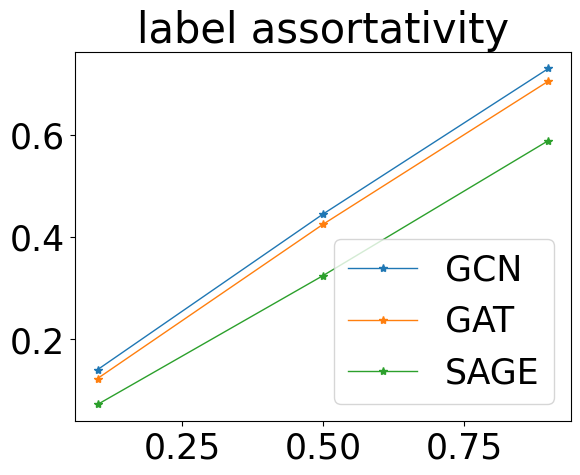

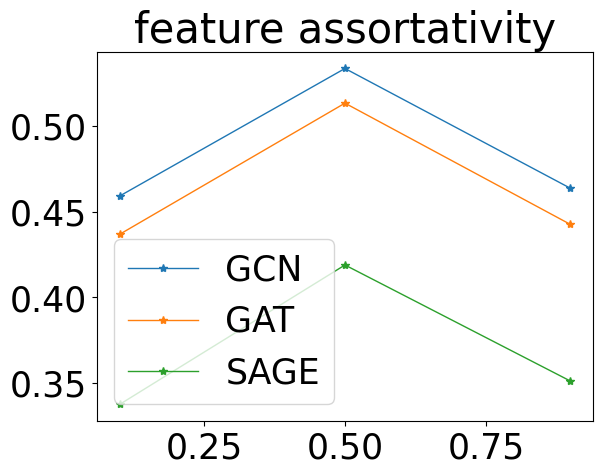

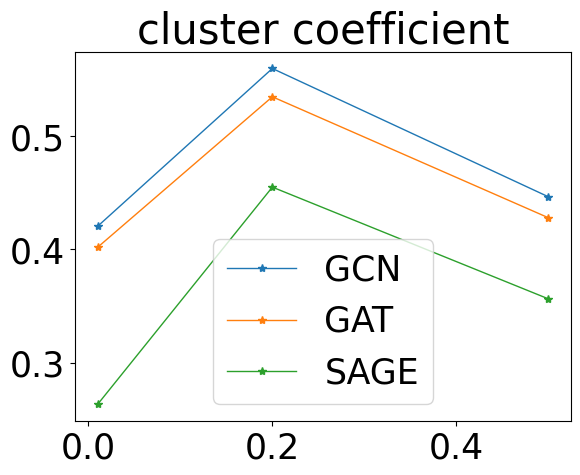

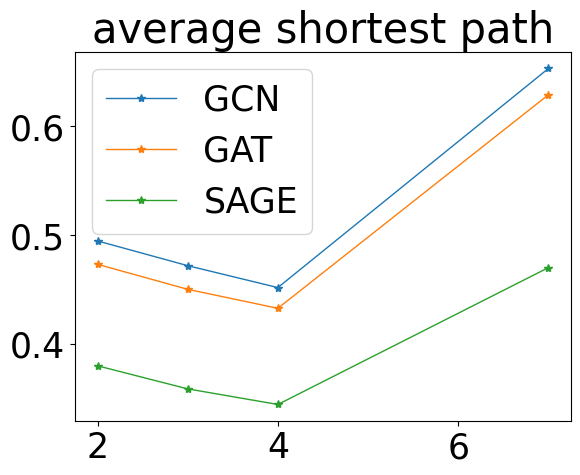

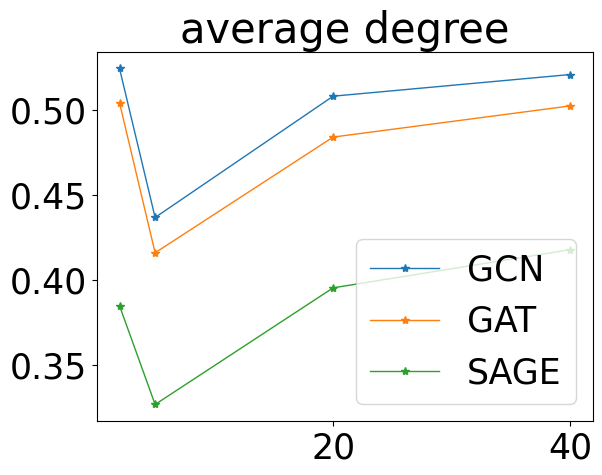

In [17]:
for feat in attrs:
    for conv in ['GCN','GAT','SAGE']:
        plt.plot( list(df[ (df['conv'] == conv)].groupby(feat).mean().index),  df[(df['conv']==conv)].groupby(feat).mean()['test acc micro'],label=conv,marker='*', linewidth = 1)
    plt.legend()
    plt.title(feat)
    plt.show()


# boxplots (только для GCN) рисунки 6-8

In [35]:
#не все ф.п. рассматриваем
df=pd.read_csv('final_data.csv')
df=df.drop(columns=['Unnamed: 0'])
df_boxplots = df[(df['loss' ]=='VERSE_Adj')|(df['loss']=='HOPE_RPR') | (df['loss']=='LapEigen') | (df['loss']=='VERSE_SR') | (df['loss' ]=='DeepWalk')| (df['loss' ]=='Force2Vec')]
features=['label assortativity','feature assortativity','cluster coefficient','average shortest path','average degree']

### рисунок 5

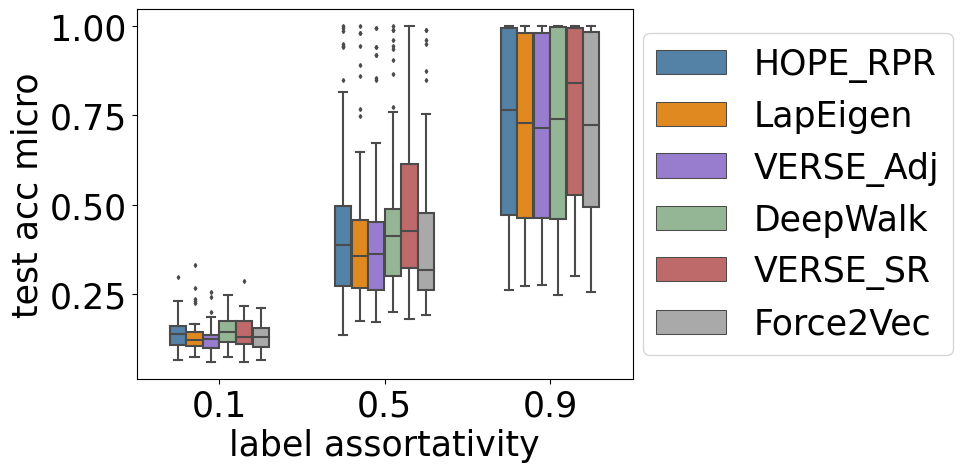

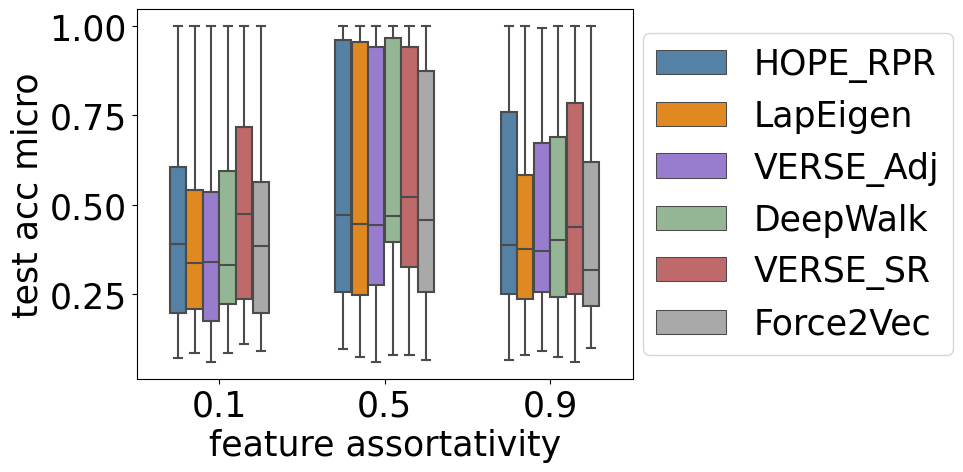

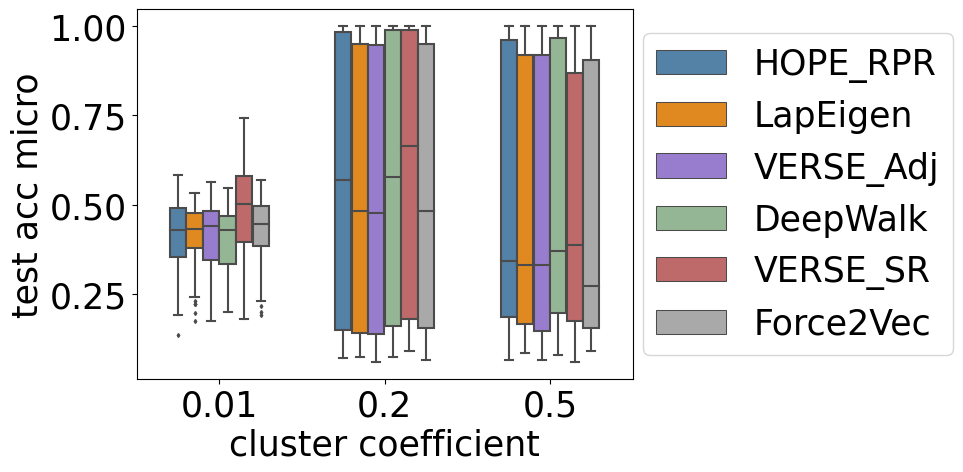

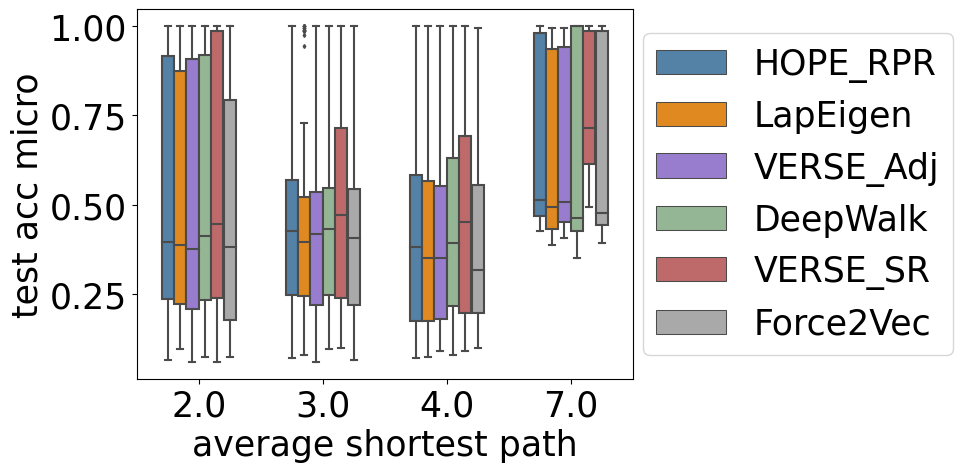

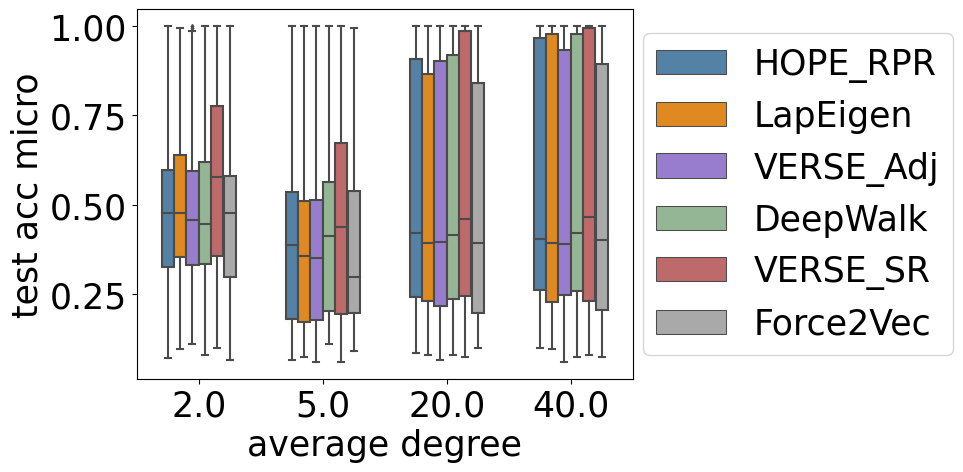

In [40]:
font = {'size' : 25}
matplotlib.rc('font', **font)

my_pal = {"HOPE_RPR": "steelblue", "LapEigen": "darkorange", "DeepWalk": "darkseagreen","VERSE_Adj":"mediumpurple","VERSE_SR":"indianred","Force2Vec":'darkgray'}
for attr in attrs: 
        sns.boxplot(data=df_boxplots[(df_boxplots['conv']=='GCN')], x=attr,y="test acc micro" , width=0.6, hue="loss",palette=my_pal,fliersize=2)
        #fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
        plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)
        plt.show() 

### для label assortativity 0.1 рисунок 6

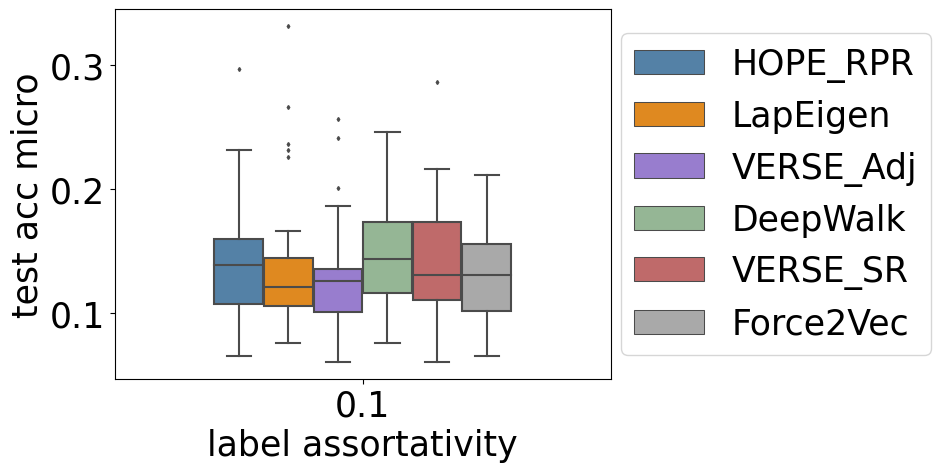

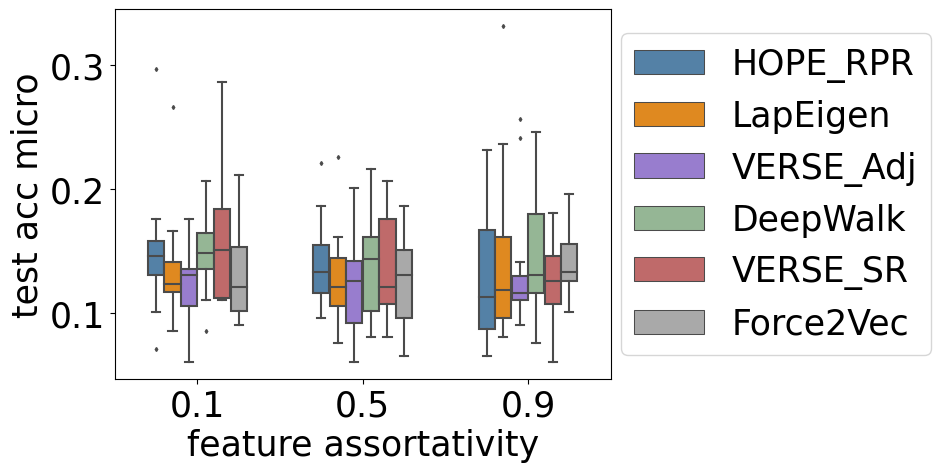

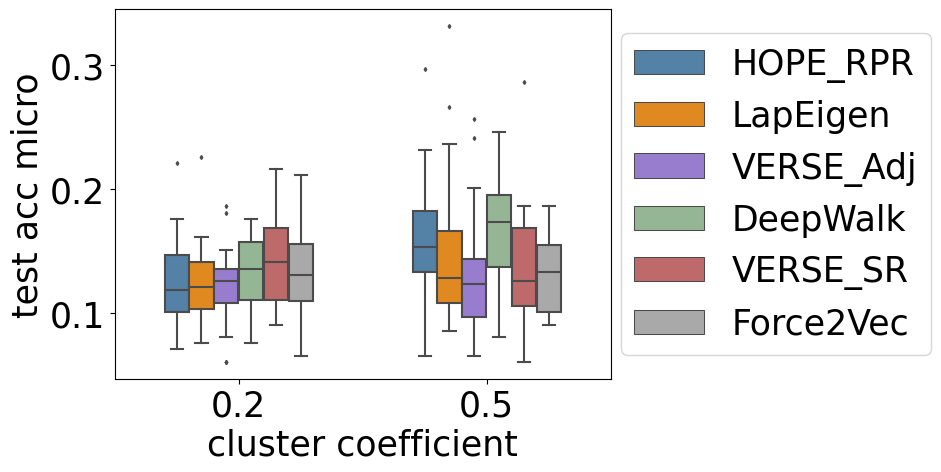

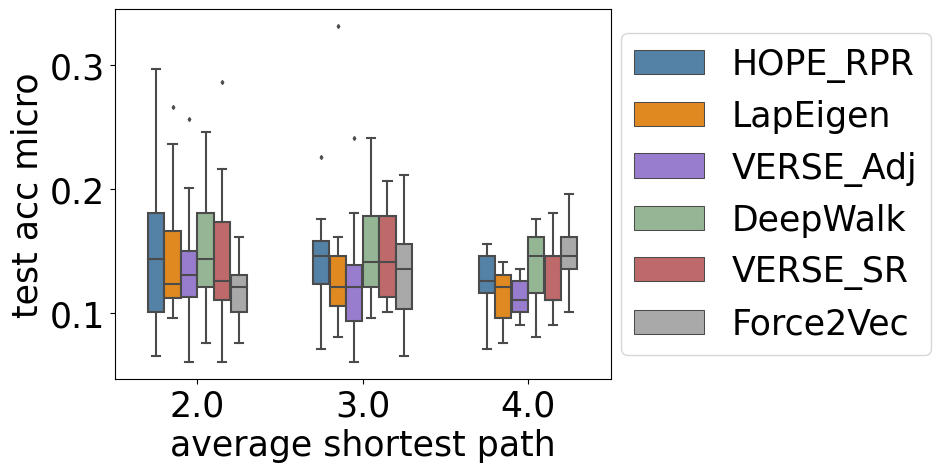

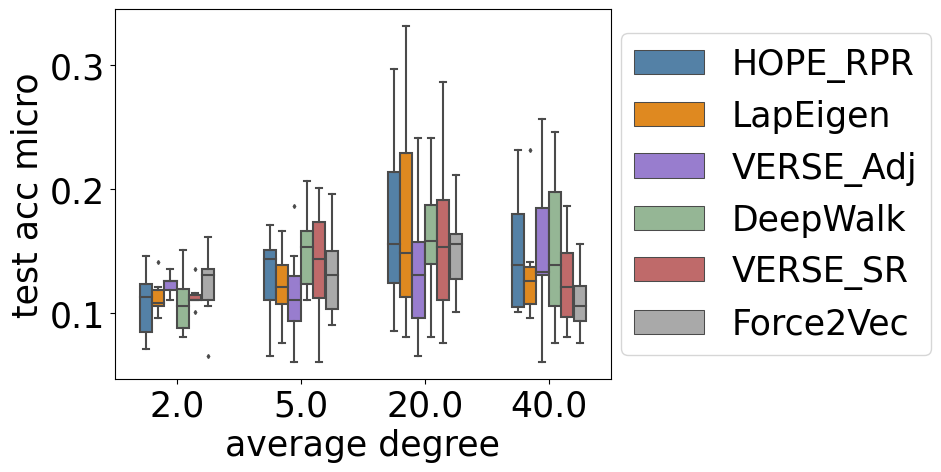

In [36]:
font = {'size' : 25}
matplotlib.rc('font', **font)

my_pal = {"HOPE_RPR": "steelblue", "LapEigen": "darkorange", "DeepWalk": "darkseagreen","VERSE_Adj":"mediumpurple","VERSE_SR":"indianred","Force2Vec":'darkgray'}
for attr in attrs: 
        sns.boxplot(data=df_boxplots[(df_boxplots['label assortativity']==0.1)&(df_boxplots['conv']=='GCN')], x=attr,y="test acc micro" , width=0.6, hue="loss",palette=my_pal,fliersize=2)
        #fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
        plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)
        plt.show() 

### для label assortativity = 0.5

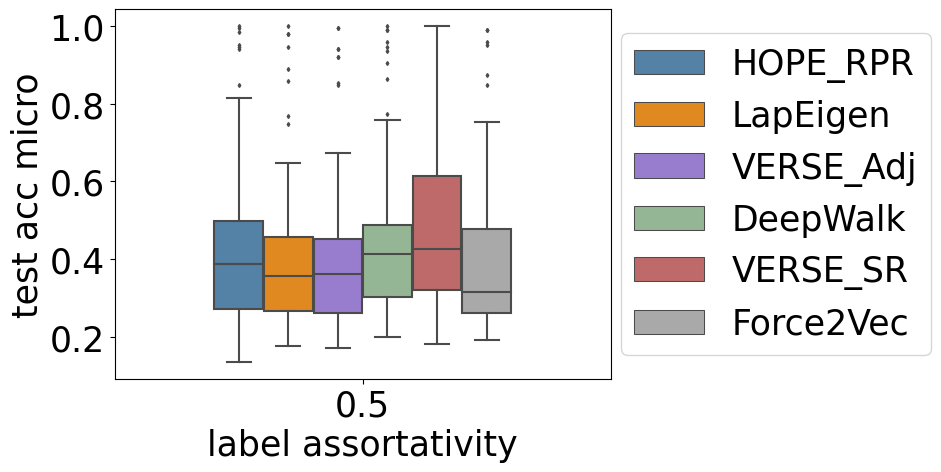

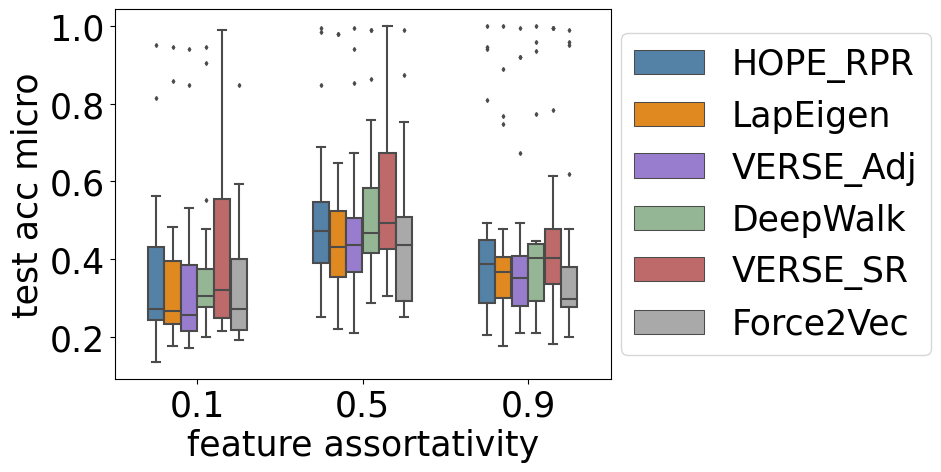

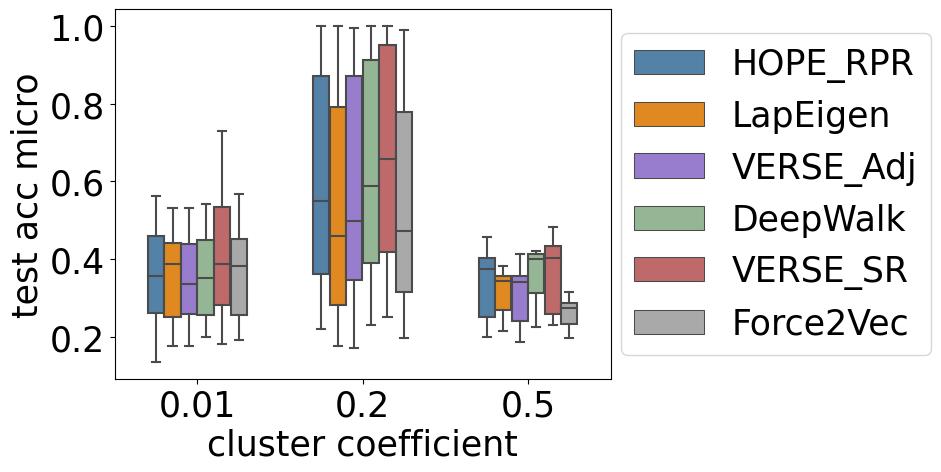

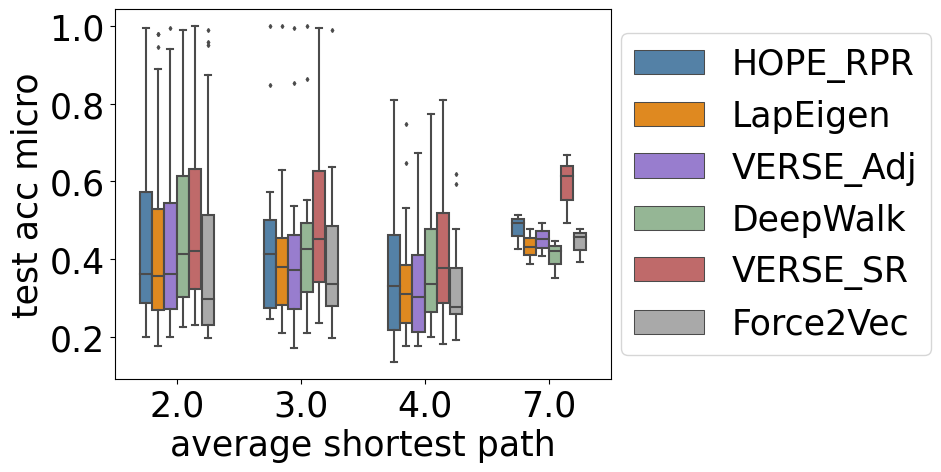

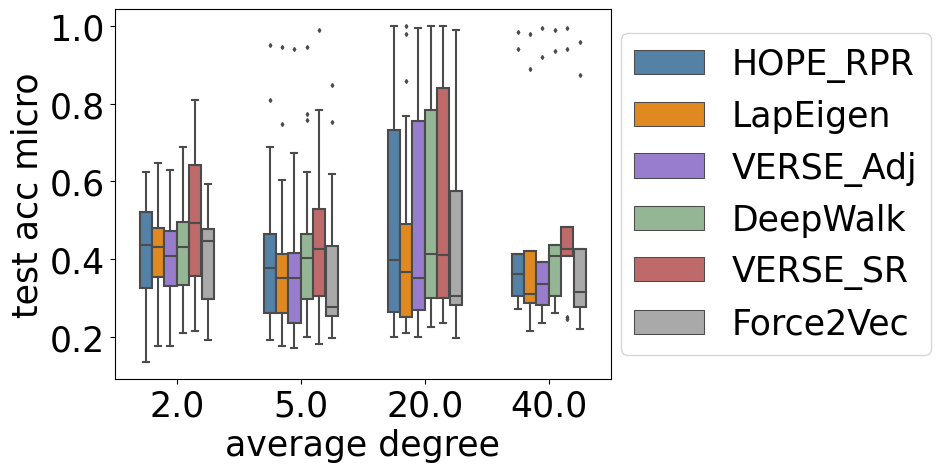

In [39]:
for attr in attrs: 
        sns.boxplot(data=df_boxplots[(df_boxplots['label assortativity']==0.5)&(df_boxplots['conv']=='GCN')], x=attr,y="test acc micro" , width=0.6, hue="loss",palette=my_pal,fliersize=2)
        #fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
        plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)
        plt.show() 

### для label assortativity = 0.9

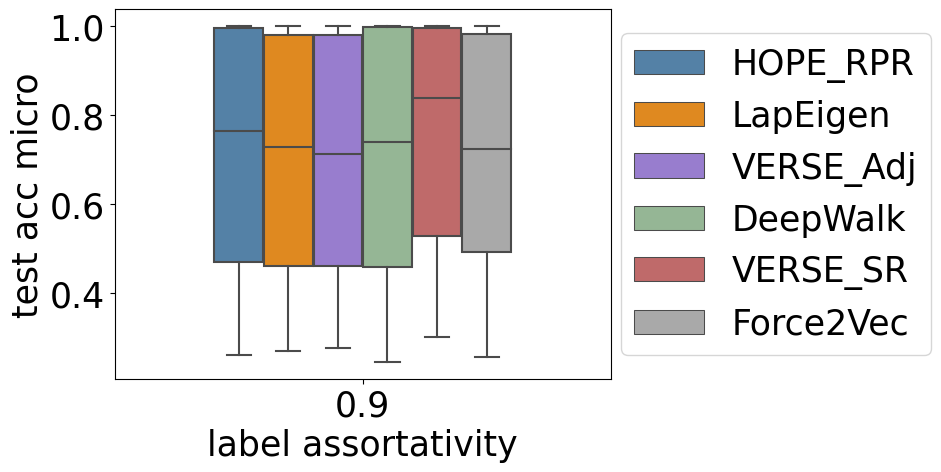

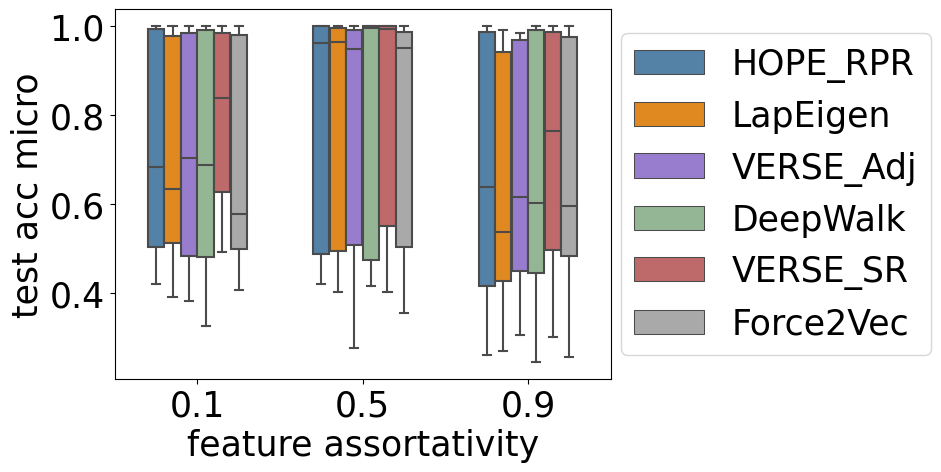

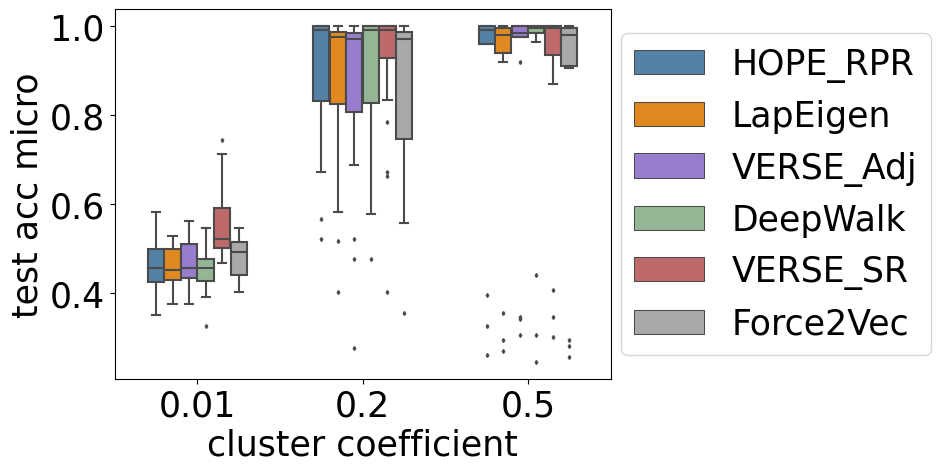

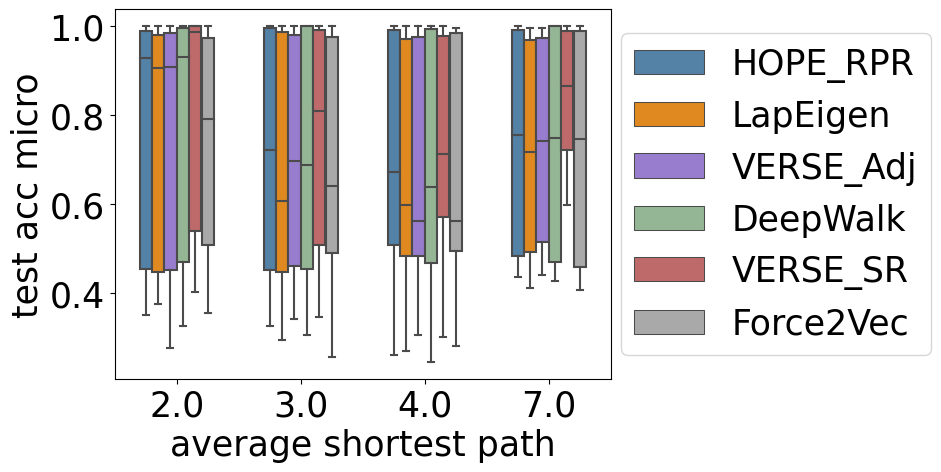

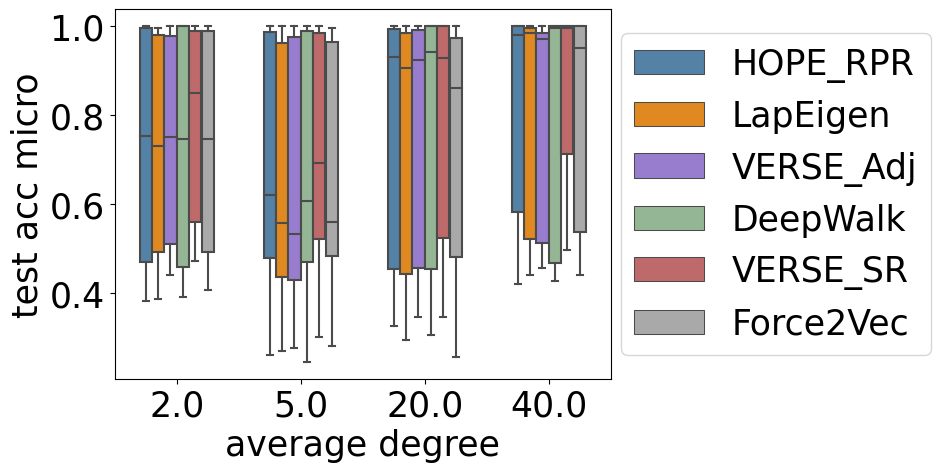

In [38]:
for attr in attrs: 
        sns.boxplot(data=df_boxplots[(df_boxplots['label assortativity']==0.9)&(df_boxplots['conv']=='GCN')], x=attr,y="test acc micro" , width=0.6, hue="loss",palette=my_pal,fliersize=2)
        #fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
        plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0)
        plt.show() 

# Statistically significant difference - discussion and results 2 point начинающийся со слов "In one of the benchmarking representation learning papers "

In [ ]:
#ANOVA
losses=list(dict(collections.Counter(df['loss'])).keys())
import scipy.stats as stats
to_test = []
for loss in losses:
    to_test.append(df[df['loss']==loss]['test acc micro'])

fvalue, pvalue = stats.f_oneway(to_test[0],to_test[1],to_test[2],to_test[3],to_test[4],to_test[5],to_test[6],to_test[7],to_test[8],to_test[9],to_test[10],to_test[11],to_test[12])
#fvalue, pvalue = stats.f_oneway(df[df['loss']=='HOPE_Katz']['test acc micro'],df[df['loss']=='HOPE_CN']['test acc micro'], df[df['loss']=='HOPE_RPR']['test acc micro'], df[df['loss']=='LapEigen']['test acc micro'],df[df['loss']=='LINE']['test acc micro'],df[df['loss']=='VERSE_PPR']['test acc micro'], df[df['loss']=='GraphFactorization']['test acc micro'], df[df['loss']=='HOPE_AA']['test acc micro'], df[df['loss']=='Node2Vec']['test acc micro'], df[df['loss']=='VERSE_Adj']['test acc micro'],df[df['loss']=='DeepWalk']['test acc micro'],df[df['loss']=='APP']['test acc micro'],df[df['loss']=='VERSE_SR']['test acc micro'])


In [ ]:
#внутри группы GF
fvalue, pvalue = stats.f_oneway(to_test[0],to_test[1],to_test[2],to_test[6],to_test[7])
print(pvalue<0.05)

In [ ]:
#внутри группы RandomWalks
fvalue, pvalue = stats.f_oneway(to_test[1],to_test[8])
print(pvalue<0.05)

In [ ]:
#внутри группы matrix sim
fvalue, pvalue = stats.f_oneway(to_test[4],to_test[5],to_test[9],to_test[11],to_test[12])
print(pvalue<0.05)

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

losses_2=['LINE','VERSE_SR','VERSE_PPR','VERSE_Adj','APP']
for i,loss1 in enumerate(losses_2):
    for loss2 in losses_2[i+1:]:
       # print(loss1,loss2)
       # print(loss)
        v1 = df[df['loss']==loss1]['test acc micro']
        v2 = df[df['loss']==loss2]['test acc micro']

        res = ttest_ind(v1, v2)

        if (res.pvalue <= 0.05):
            print(loss1,loss2)

# ВЫБИВАЕТСЯ ТОЛЬКО VERSE ADJ

## ниже идет то что я писала в главе "comparison with real graphs" в пункте 3. 
## если std маленький и max Тоже не очень большой, значит результат плохой независимо от ф.п. а просто для таких данных плохой

In [20]:

df=pd.read_csv('data_analysis_realdata.csv')
df=df.drop(columns=['Unnamed: 0'])
df

(df[(df['dataset']=='Cora') & (df['conv']=='GCN')]['test acc micro'].max(),df[(df['dataset']=='Cora') & (df['conv']=='GCN')]['test acc micro'].std())

(0.878003696857671, 0.20445071477803725)

In [21]:
(df[(df['dataset']=='Citeseer') & (df['conv']=='GCN')]['test acc micro'].max(),df[(df['dataset']=='Citeseer') & (df['conv']=='GCN')]['test acc micro'].std())

(0.7714285714285715, 0.2104812512998696)

In [22]:
(df[(df['dataset']=='Cornell') & (df['conv']=='GCN')]['test acc micro'].max(),df[(df['dataset']=='Cornell') & (df['conv']=='GCN')]['test acc micro'].std())

(0.75, 0.07058585775987036)

In [23]:
(df[(df['dataset']=='chameleon') & (df['conv']=='GCN')]['test acc micro'].max(), df[(df['dataset']=='chameleon') & (df['conv']=='GCN')]['test acc micro'].std())

(0.3934065934065934, 0.022010964322732796)

In [24]:
(df[(df['dataset']=='Wisconsin') & (df['conv']=='GCN') ]['test acc micro'].max(),df[(df['dataset']=='Wisconsin') & (df['conv']=='GCN') ]['test acc micro'].std())

(0.6, 0.039585767228045056)

In [25]:
(df[(df['dataset']=='Texas') & (df['conv']=='GCN') ]['test acc micro'].max() ,df[(df['dataset']=='Texas') & (df['conv']=='GCN') ]['test acc micro'].std())

(0.6944444444444444, 0.05404697806300091)